# Explore here

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

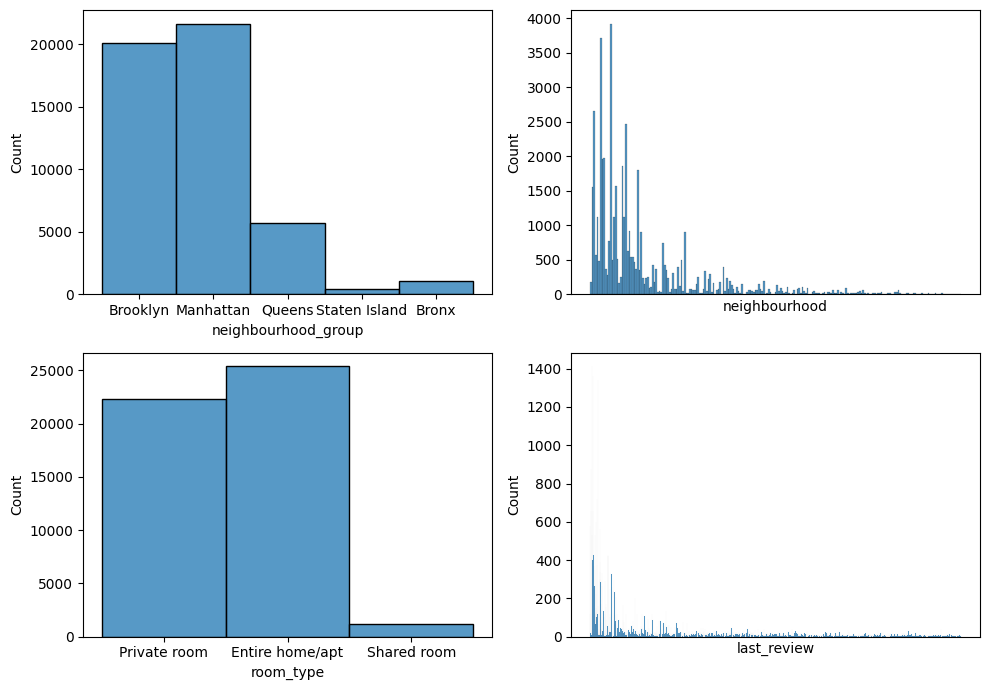

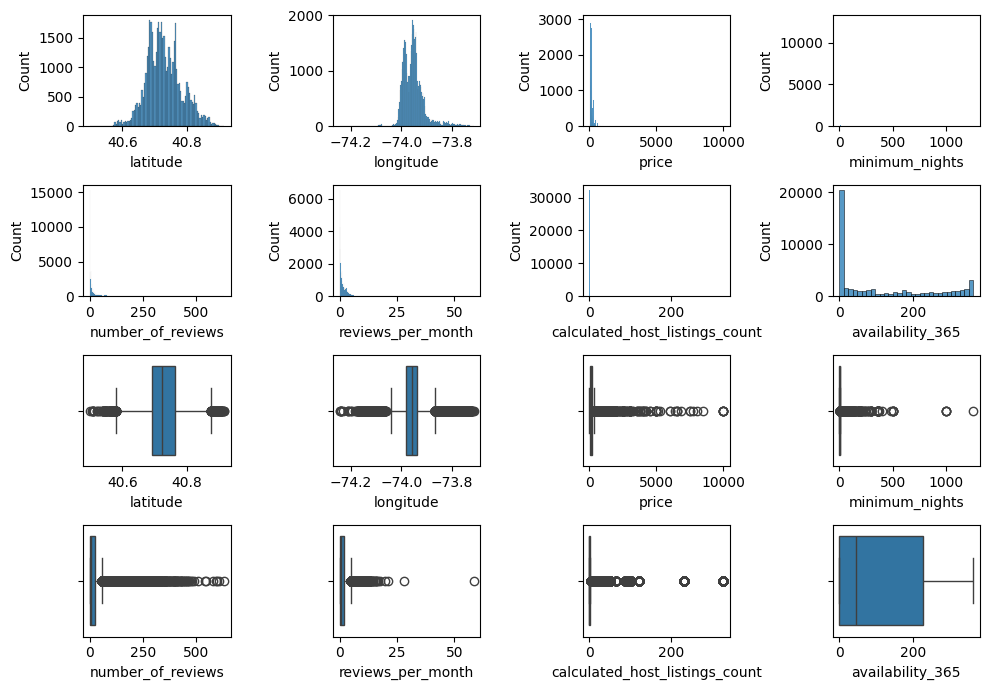

Done


In [4]:
#from utils import db_connect
#engine = db_connect()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# your code here
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.describe(include=np.number).T)
print(df.describe(include=["O"]).T) #or "object"
print(df.drop("id", axis = 1).duplicated().sum())
if df.drop("id", axis = 1).duplicated().sum() != 0:
    df.drop_duplicates(inplace=True)
"""Clean the data"""
df.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=["object"])
print(df.info())
"""Categorical Data"""
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
index = 0
for i in range(2):
    if index > 3:
        break
    for j in range(2):
        c = df_cat.columns[index]
        s = sns.histplot(ax = axis[i,j],data = df_cat, x = c)
        if c in ["neighbourhood", "last_review"]:
            s.set_xticks([])
        index  +=1
# Adjust the layout
plt.xticks(rotation = 90)
plt.tight_layout()
# Show the plot
plt.savefig("df_cat.jpg")
plt.show()
"""Numerical Data"""
fig, axis = plt.subplots(4, 4, figsize = (10, 7))
index = 0
for i in range(2):
    if index > 5:
        break
    for j in range(4):
        c = df_num.columns[index]
        sns.histplot(ax = axis[i,j],data = df_num, x = c)
        sns.boxplot(ax = axis[i+2,j],data = df_num, x = c)
        index  +=1
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.savefig("df_num.jpg")
plt.show()
print("Done")
